In [39]:
import pandas as pd
import seaborn as sns

In [40]:
df = pd.read_csv('../data/raw/historical_product_demand.csv')

In [41]:
df.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500
8,Product_0979,Whse_J,Category_028,2012/7/23,500
9,Product_0979,Whse_J,Category_028,2012/8/29,500


In [42]:
df.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50
1048574,Product_0704,Whse_J,Category_001,2016/6/27,4


In [43]:
df.tail(30)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048545,Product_0219,Whse_J,Category_007,2016/5/20,25
1048546,Product_0188,Whse_J,Category_007,2016/5/25,10
1048547,Product_0219,Whse_J,Category_007,2016/7/7,24
1048548,Product_0179,Whse_J,Category_007,2016/8/17,30
1048549,Product_0185,Whse_J,Category_007,2016/8/17,30
1048550,Product_0188,Whse_J,Category_007,2016/8/17,30
1048551,Product_0215,Whse_J,Category_007,2016/10/6,6
1048552,Product_0217,Whse_J,Category_007,2016/10/6,180
1048553,Product_0220,Whse_J,Category_007,2016/10/6,26
1048554,Product_0221,Whse_J,Category_007,2016/10/6,98


In [44]:
#Hi I am a comment. 

In [45]:
history = pd.read_csv('../data/raw/historical_product_demand.csv')

In [46]:
history[:5]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [47]:
history.shape

(1048575, 5)

In [48]:
len(history['Product_Category'].unique())

33

In [49]:
len(history['Product_Code'].unique())

2160

In [50]:
#We see that there are 2160 products that fit into 33 categories

In [52]:
X = history[['Product_Code','Warehouse','Product_Category']]
Y = history[['Order_Demand']]

In [53]:
from sklearn import preprocessing
def encode(x):
    le = preprocessing.LabelEncoder()
    return le.fit_transform(x)

In [54]:
for column in X.columns:
    X[column] = encode(X[column])

C:\Users\WilliamDuncan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [78]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [104]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [105]:
#Built a decision tree, but for some reason cannot get the graphics to work. 

In [69]:
from sklearn.model_selection import cross_val_score


In [73]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

In [107]:
cross_val_score(regressor, X, Y, cv=10)

ValueError: could not convert string to float: '(270)'

In [109]:
#With the above cross_val_score command I wanted to see how well the decision tree performed, 
#but the set-up of the formate of the data, string, was problematic. 

In [ ]:
#Below, I found an idea to try something a little different: 

In [57]:
import datetime as dt
import seaborn as sns
import math


In [58]:
def remove_car(string):
    if string.find('(') != -1:
        return int(string[string.find('(') + 1: string.find(')')])
    else:
        return int(string)


In [59]:
def get_week(df_data):
    #     print(dt.date(df_data['Year'], df_data['Month'], df_data['Day']))
    #     print(dt.date(df_data['Year'], df_data['Month'], df_data['Day']).isocalendar()[1])
    return dt.date(df_data['Year'], df_data['Month'], df_data['Day']).isocalendar()[1]


In [60]:
df_data = pd.read_csv('../data/raw/historical_product_demand.csv')

In [61]:
df_data = df_data.dropna()
df_data['Date'] = df_data['Date'].apply(lambda x: str(x))
df_data['Year'] = df_data['Date'].apply(lambda x: int(x[0:x.find('/')]))
df_data['Date'] = df_data['Date'].apply(lambda x: x[x.find('/') + 1: len(x)])
df_data['Month'] = df_data['Date'].apply(lambda x: int(x[0:x.find('/')]))
df_data['Day'] = df_data['Date'].apply(lambda x: int(x[x.find('/') + 1: len(x)]))
df_data['Week'] = df_data.apply(get_week, axis=1)
df_data = df_data.drop(['Date'], axis=1)


In [62]:
df_data['Month_evol'] = df_data.apply(lambda x: (x['Year'] - 2011) * 12 + x['Month'], axis=1)
df_data['Week_evol'] = df_data.apply(lambda x: (x['Year'] - 2011) * 52 + x['Week'], axis=1)
df_data = df_data.sort_values(['Year', 'Month', 'Day'])
df_data['Order_Demand'] = df_data['Order_Demand'].apply(remove_car)


In [63]:
df_gb = pd.DataFrame(
    df_data.groupby(['Product_Code', 'Month_evol'], as_index=False)['Order_Demand'].agg(['sum']).reset_index())


In [64]:
import numpy as np

In [123]:
product_list = list(set(df_gb['Product_Code'].as_matrix()))


tot_nb_month = 0
#total unsatisfied demand in terms of volume
tot_demand_not_satisfy = 0
#total satisfied demand in terms of volume
tot_demand_satisfy = 0
#number of months with a deadstock
tot_dead_stock = 0
#total volume in the stock
tot_inventory = 0

#for each product
for p in product_list:
    #we study only that product
    serie = df_gb[df_gb['Product_Code'] == p]['sum'].as_matrix()

    #current unsatisfied volume
    demand_not_satisfy = 0
    #current number of dead-stock
    out_of_stock = 0
    
    i = 10

    #we have to set some initial parameters, there is probably better methods to do it
    reorder_level = [serie[0]] * 10
    upto_level = [serie[0]] * 10
    inventory_level = [serie[0]] * 10
    reorder_quantity = [serie[0]] * 10
    past_i = 0
    time_window = 12
    while i < len(serie):
        past_i = i - time_window
        if past_i < 0:
            past_i = 0
        #at the beginning of each month, we will recompute the mean and the variance of the previous time_window values
        mean_serie = np.mean(serie[past_i:i])
        var_serie = np.std(serie[past_i:i])
        #we have to set a limit under which we have to order a volume
        reorder_level.append(mean_serie + 1.0 * var_serie)
        #we reorder a volume to reach upto_level limit.
        upto_level.append(mean_serie + 1.5 * var_serie)
        tot_nb_month += 1
        
        #to begin the new month , we have the inventory of the previous month + what we have order two months ago (1 month of delay) 
        #at the end of the month we have to remove the demand of the current month  
        if inventory_level[len(inventory_level) - 1] + reorder_quantity[len(reorder_quantity) - 2] - serie[i] < 0:
            #we have an unsatisfied demand which corresponds to what is asked for this month - what we had 
            demand_not_satisfy += serie[i] - inventory_level[len(inventory_level) - 1] - reorder_quantity[
                len(reorder_quantity) - 2]
            #the satisfied demand corresponds to what we had in stock.
            tot_demand_satisfy += inventory_level[len(inventory_level) - 1] + reorder_quantity[len(reorder_quantity) - 2]
            #if the stock is negative we have a dead stock
            out_of_stock = out_of_stock + 1
            #the inventory_level falls down 0
            inventory_level.append(0)

        else:
            #if it's possitive, we satisfied
            tot_demand_satisfy += serie[i]
            #we remove the demand from what we had in stock at the beginning of the month.
            inventory_level.append(
                inventory_level[len(inventory_level) - 1] + reorder_quantity[len(reorder_quantity) - 2] - serie[i])

        #at the end of the month, we have to decide if we reorder a volume of not.
        #if it's under of the computed limit reorder_level, we do either we don't
        #we reorder a quantity in order to reach upto_level limit
        if inventory_level[len(inventory_level) - 1] < reorder_level[len(reorder_level) - 1]:
#             if upto_level[len(upto_level) - 1] - inventory_level[len(inventory_level) - 1] - reorder_quantity[len(reorder_quantity) - 1] > 0:
            reorder_quantity.append(upto_level[len(upto_level) - 1] - inventory_level[len(inventory_level) - 1])
#             else :
#                 reorder_quantity.append(0)
                
        else:
            reorder_quantity.append(0)

        i = i + 1
    tot_demand_not_satisfy += demand_not_satisfy
    tot_dead_stock += out_of_stock
    tot_inventory += np.sum(inventory_level)
    


C:\Users\WilliamDuncan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\WilliamDuncan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [67]:
print('number of total months')
print(tot_nb_month)
print('number of dead stocks (all products)')
print(tot_dead_stock)
print('satisfied demand (all products)')
print(tot_demand_satisfy)
print('unsatisfied demand (all products)')
print(tot_demand_not_satisfy)
print('total volume in the inventory (all products)')
print(tot_inventory)
print("ratio of satisfied demands")
print(tot_demand_satisfy/(tot_demand_satisfy + tot_demand_not_satisfy))
print('ratio of inventory')
print(tot_inventory/(tot_demand_satisfy + tot_demand_not_satisfy))

number of total months
84414
number of dead stocks (all products)
16293
satisfied demand (all products)
3953973084.128121
unsatisfied demand (all products)
382218828.8718794
total volume in the inventory (all products)
3450997057.0533466
ratio of satisfied demands
0.9118538024744757
ratio of inventory
0.7958589302072125


In [122]:
#Below are each of the four graphs individually, and then one graph where all of them are combined. 

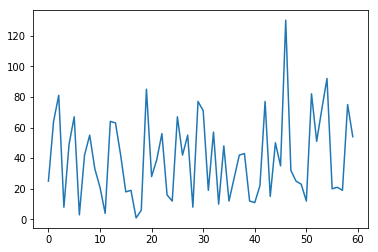

In [115]:
plt.plot(serie, label='serie')

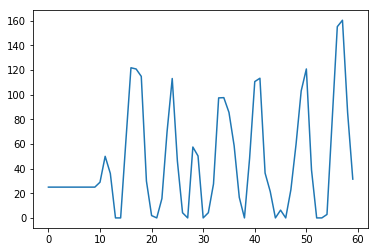

In [116]:
plt.plot(inventory_level, label='inventory')

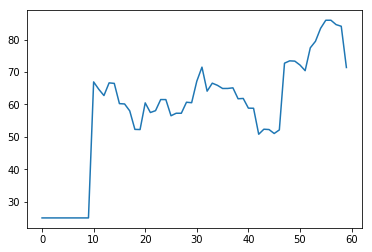

In [117]:
plt.plot(reorder_level, label='reorder_level')

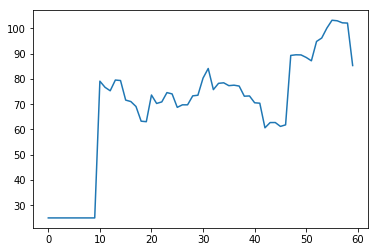

In [118]:
plt.plot(upto_level, label='upto')

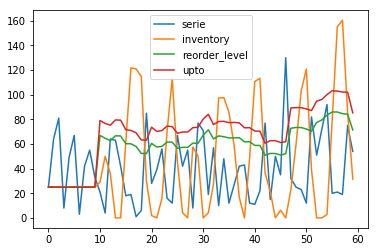

In [121]:
plt.figure()
plt.plot(serie, label='serie')
plt.plot(inventory_level, label='inventory')
plt.plot(reorder_level, label='reorder_level')
plt.plot(upto_level, label='upto')
plt.legend()
plt.show()